<h2>Dataset Link</h2>



https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/data

baseline value: Baseline Fetal Heart Rate (FHR) <br>
accelerations: Number of accelerations per second <br>
fetal_movement: Number of fetal movements per second <br>
uterine_contractions: Number of uterine contractions per second <br>
light_decelerations: Number of LDs per second <br>
severe_decelerations: Number of SDs per second <br>
prolongued_decelerations: Number of PDs per second <br>
abnormal_short_term_variability: Percentage of time with abnormal short term variability <br>
mean_value_of_short_term_variability: Mean value of short term variability <br>
percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability <br>
mean_value_of_long_term_variability: Mean value of long term variability <br>
histogram_width: Width of the histogram made using all values from a record <br>
histogram_min: Histogram minimum value <br>
histogram_max: Histogram maximum value <br>
histogram_number_of_peaks: Number of peaks in the exam histogram <br>
histogram_number_of_zeroes: Number of zeroes in the exam histogram <br>
histogram_mode: Hist mode <br>
histogram_mean: Hist mean <br>
histogram_median: Hist Median <br>
histogram_variance: Hist variance <br>
histogram_tendency: Histogram trend <br>
fetal_health - Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

<h2>Data Preprocessing</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import random
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.shape

(2126, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.duplicated().sum()

np.int64(13)

In [6]:
df[df.duplicated()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


In [7]:
pct_duplicated = (df.duplicated().sum() / df.shape[0])*100
print(f'{pct_duplicated:.2f}% of the data is duplicated')

0.61% of the data is duplicated


In [8]:
# drop duplicate data
df.drop_duplicates(inplace=True)
df.shape

(2113, 22)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2113.0,133.304780,9.837451,106.0,126.000,133.000,140.000,160.000
accelerations,2113.0,0.003188,0.003871,0.0,0.000,0.002,0.006,0.019
fetal_movement,2113.0,0.009517,0.046804,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2113.0,0.004387,0.002941,0.0,0.002,0.005,0.007,0.015
light_decelerations,2113.0,0.001901,0.002966,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2113.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2113.0,0.000159,0.000592,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2113.0,46.993848,17.177782,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2113.0,1.335021,0.884368,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2113.0,9.795078,18.337073,0.0,0.000,0.000,11.000,91.000


<h2>EDA</h2>

In [10]:
# Create subplots
fig, axes = plt.subplots(nrows=len(df.columns), figsize=(30, 10 * len(df.columns)))

# Loop through columns and plot countplots
for i, col in enumerate(df.columns):
    sns.countplot(x=df[col], hue=df['fetal_health'], ax=axes[i])
    axes[i].set_title(f"Count Plot of {col}")

plt.tight_layout()
plt.show();

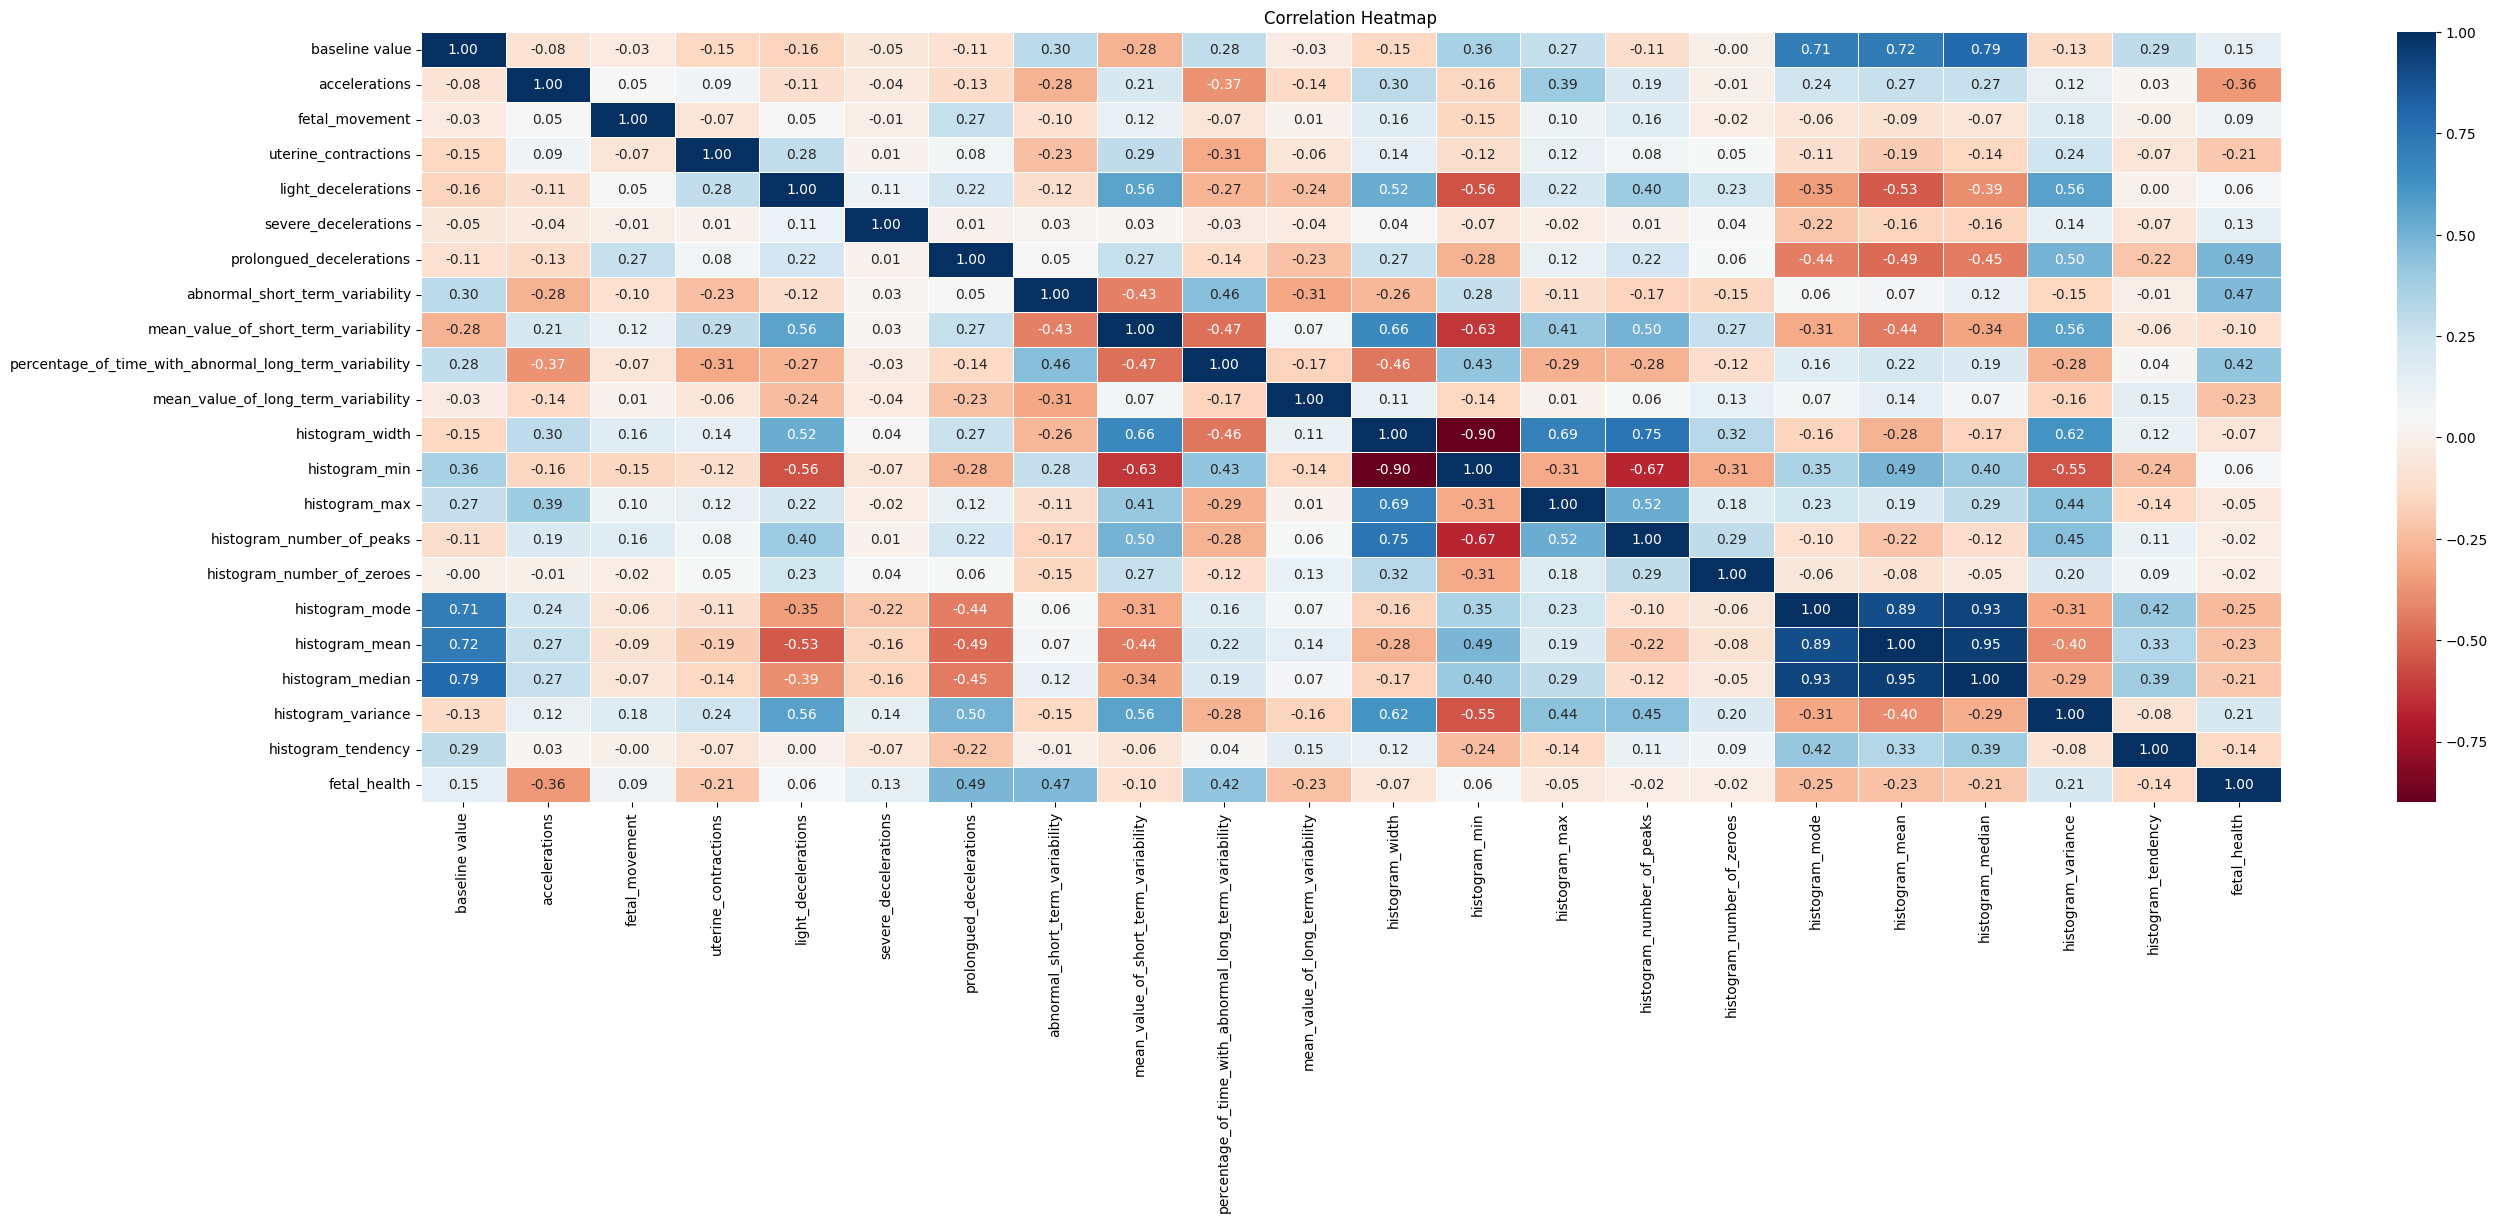

In [11]:
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show();

<h2>Data Splitting</h2>

In [12]:
x = df.drop(['fetal_health', 'histogram_mean'], axis=1) # drop histogram_mean due to highly correlated
y = df['fetal_health']

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<h2>Machine Learning<h2>

In [15]:
gb = GradientBoostingClassifier(n_estimators=300, random_state=42)
gb.fit(x_train, y_train)
print('Training score:',gb.score(x_train, y_train))
print('Testing score:',gb.score(x_test,y_test))

Training score: 0.9994082840236687
Testing score: 0.9621749408983451


In [16]:
y_pred = gb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       341
           1       0.93      0.80      0.86        54
           2       0.96      0.96      0.96        28

    accuracy                           0.96       423
   macro avg       0.95      0.92      0.93       423
weighted avg       0.96      0.96      0.96       423



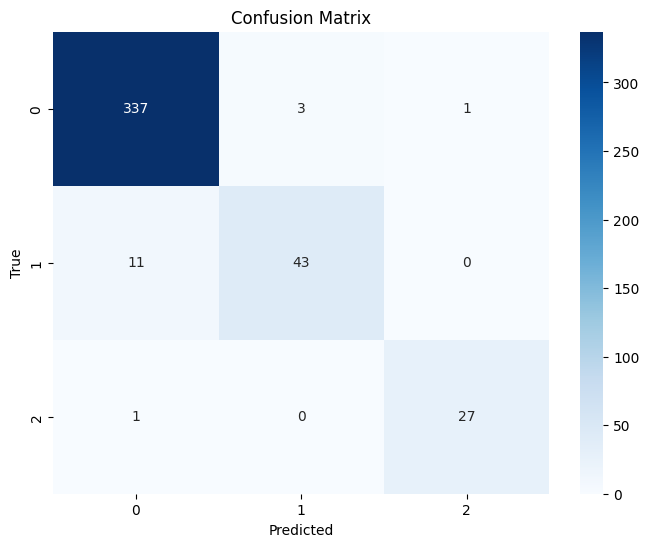

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show();

In [18]:
# Save the ML model
joblib.dump(gb, 'ML_model.pkl')
print("ML model saved successfully!")

ML model saved successfully!


<h2>Deep Learning</h2>

In [19]:
DL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='tanh', kernel_initializer='he_normal', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='tanh', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
DL_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = DL_model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6188 - loss: 0.8688 - val_accuracy: 0.8889 - val_loss: 0.3263
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8523 - loss: 0.4121 - val_accuracy: 0.9102 - val_loss: 0.2356
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.3319 - val_accuracy: 0.9149 - val_loss: 0.2102
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8786 - loss: 0.3023 - val_accuracy: 0.9007 - val_loss: 0.2085
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8756 - loss: 0.3147 - val_accuracy: 0.9196 - val_loss: 0.1856
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8885 - loss: 0.2743 - val_accuracy: 0.9267 - val_loss: 0.1854
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9038 - loss: 0.2311 - val_accuracy: 0.9291 - val_loss: 0.1849
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9088 - loss: 0.2371 - val_accuracy: 0.

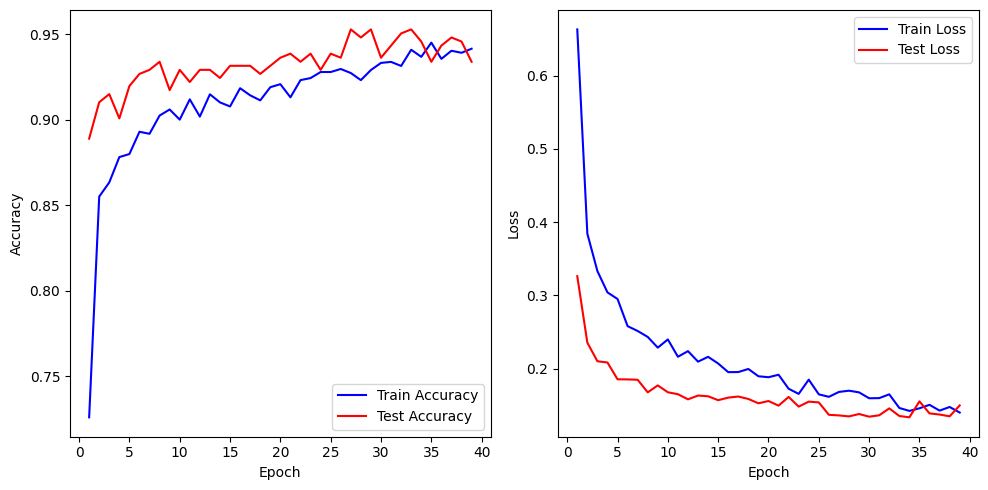

In [20]:
# learning curve
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Test Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# adusting layout for better spacing
plt.tight_layout()

# display the figure
plt.show();

In [21]:
y_pred = DL_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [22]:
cr_DL = classification_report(y_test, y_pred_classes)
print(cr_DL)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       341
           1       0.75      0.80      0.77        54
           2       0.93      0.89      0.91        28

    accuracy                           0.93       423
   macro avg       0.88      0.88      0.88       423
weighted avg       0.94      0.93      0.93       423



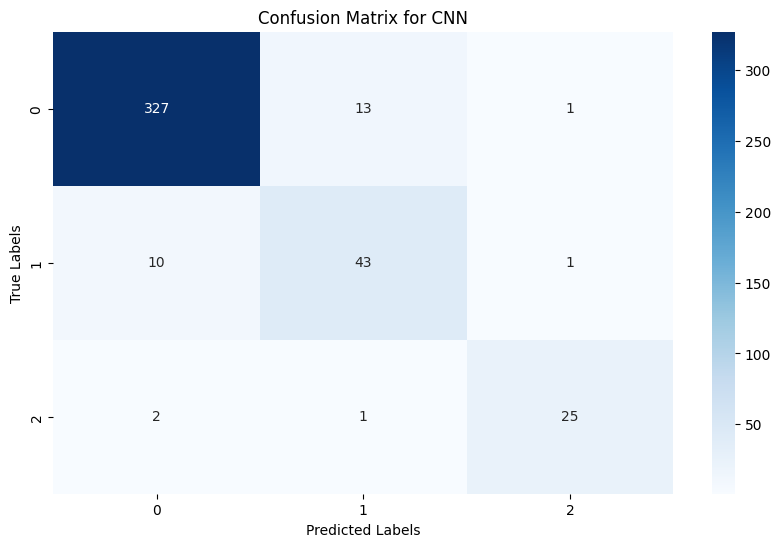

In [23]:
cm_DL = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 6))
sns.heatmap(cm_DL, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for CNN")
plt.show()

In [24]:
# Save the CNN model
DL_model.save('DL_model.keras')
print("DL model saved successfully!")

DL model saved successfully!


<h2>Machine Learning vs Deep Learning<h2>

In [25]:
# Load Models
ML_model = joblib.load('ML_model.pkl')
DL_model = load_model("DL_model.keras")

new_data = [[151, 0, 0, 0.001, 0, 0, 0, 81, 0.4, 17, 7.1, 44, 129, 175, 2, 0,  151, 152, 1, 0]]
new_data_scaled = sc.transform(new_data)

ML_prediction = ML_model.predict(new_data_scaled)

new_data_scaled = np.expand_dims(new_data_scaled, axis=-1)
y_pred = DL_model.predict(new_data_scaled)
DL_prediction = np.argmax(y_pred, axis=1)

print("ML Suggested Crop:", ML_prediction)
print("CNN Suggested Crop:", DL_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
ML Suggested Crop: [2]
CNN Suggested Crop: [2]
